In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

homedir = "/home/annzhou"
dringsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/dring.txt"
rrgsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/rrg.txt"
swlist = [120,140,160]
sseedarr = range(1,6)

dringylist = list()
with open(dringsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        dringseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability2_dring_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    dringseedlist.append(n99fct)
        dringylist.append(sum(dringseedlist)/len(dringseedlist))

rrgylist = list()
with open(rrgsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        rrgseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability2_rrg_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    rrgseedlist.append(n99fct)
        rrgylist.append(sum(rrgseedlist)/len(rrgseedlist))

/tmp/ipykernel_3376390/1090641105.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)


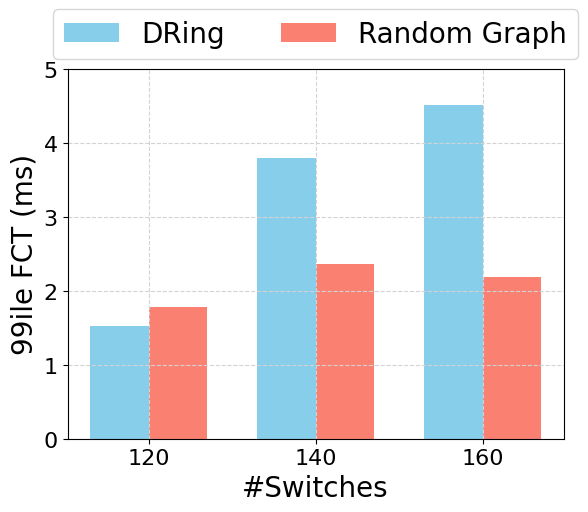

In [15]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Sample data
categories = swlist
values1 = dringylist  # Values for the first category
values2 = rrgylist   # Values for the second category

# Bar width
bar_width = 0.35

# Positions of bars on the x-axis
index = np.arange(len(categories))

# Create a bar plot
fig, ax = plt.subplots()

# Plot bars for the first category
bars1 = ax.bar(index - bar_width/2, values1, bar_width, label='DRing', color='skyblue') #, hatch='/')

# Plot bars for the second category
bars2 = ax.bar(index + bar_width/2, values2, bar_width, label='Random Graph', color='salmon') #, hatch='x')

# Add labels, title, and legend
ax.set_ylabel('99ile FCT (ms)',fontsize=20)
ax.set_xlabel('#Switches',fontsize=20)
# ax.set_title('Bar Plot with Two Categories')
ax.set_xticks(index)
ax.set_xticklabels(categories, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
ax.set_ylim(3,8)
ax.grid(color='lightgrey', linestyle='dashed', axis="both")
ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2), fontsize=20)

# Show the plot
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_scale_high.pdf", dpi=600, bbox_inches='tight')
plt.show()
